In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def Get_Neighbors(Graph, contig_path, alignment_type, filename):
    if alignment_type == 'osab':
        suffix = '.common_contigs.list'
    else:
        suffix = '.final_contig.list'
    filepath = contig_path+alignment_type+'_'+filename+suffix
    contigs = open(filepath,'r').readlines()
    op_dict = {}
    for c in contigs:
        op_dict[c[:-1]] = alignment_type
        try:
            c = c.replace("\n","")
            pred = list(Graph.predecessors(c))
            succ = list(Graph.successors(c))
            neighbors = list(set(pred+succ))
            for n in neighbors:
                if n == c:
                    neighbors.pop(n)
                try:
                    if op_dict[n] != 'Neighbor':
                        pass
                except KeyError:
                    op_dict[n] = 'Neighbor'
        except Exception:
            pass
    return op_dict

In [16]:
Contigs_Path = '/Users/harihara/Mount/osa_osb_all_samples/'
Graph_path = '/Users/harihara/Mount/MetaCarvel_output/wo_rd/'
Sample_id = 'HotsprSampleMS60_FD'
coverage_path = '/Users/harihara/Mount-2/Hot_Springs_Analysis/MS60_OS_Analysis/Read_Coverage.csv'
G = nx.read_gml(Graph_path+Sample_id+'_scaffolds_no_rd/oriented.gml')
coverage = pd.read_csv(coverage_path).rename(columns = {'Contig':'Node'})
coverage = coverage.set_index('Node')
length = pd.read_csv(Graph_path+Sample_id+'_scaffolds_no_rd/contig_length', 
                       names = ['Node','Length'], sep = '\t', index_col = ['Node'])
coverage = coverage.join(length)
coverage['Coverage'] = coverage['Average_Read_Length']*coverage['Count']/coverage['Length']

In [17]:
op_dict_a = Get_Neighbors(G, Contigs_Path, 'osa', Sample_id)
op_dict_b = Get_Neighbors(G, Contigs_Path, 'osb', Sample_id)
op_dict_ab = Get_Neighbors(G, Contigs_Path, 'osab', Sample_id)
alignment_dict = {'osa':op_dict_a,'osb':op_dict_b,'osab':op_dict_ab}
merged_dict = {}

for aligns in ['osa','osb','osab']:
    d = alignment_dict[aligns]
    for k in d.keys():
        try:
            if merged_dict[k] != 'Neighbor' and d[k] != 'Neighbor':
                merged_dict[k] = d[k]
            else:
                merged_dict[k] = d[k]
        except KeyError:
            merged_dict[k] = d[k]
df_osa_osb = pd.DataFrame(list(merged_dict.items())).rename(columns = {0:'Node',1:'Alignment'})
df_osa_osb = df_osa_osb.set_index('Node')

In [18]:
df_osa_osb = df_osa_osb.join(coverage)

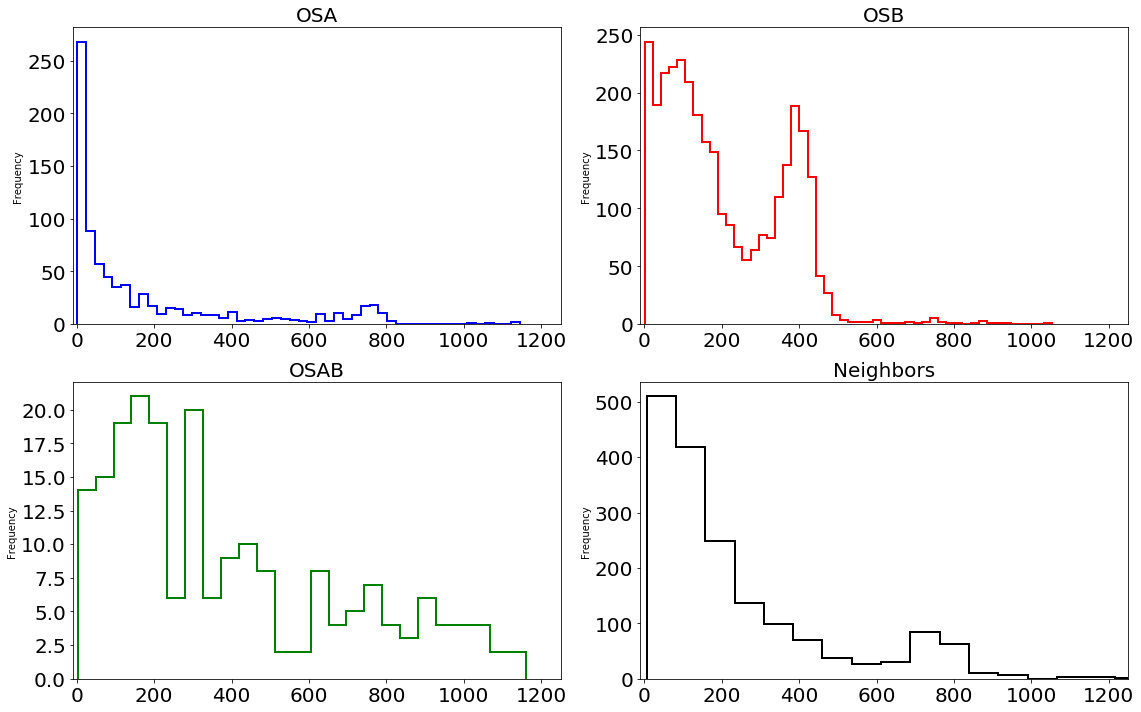

In [19]:
fig,ax = plt.subplots(2,2,figsize=(16,10)) 
df_osa_osb[df_osa_osb['Alignment']=='osa'][['Coverage']].plot(kind = 'hist', bins = 50, color = 'blue',
                                                histtype = 'step', ax = ax[0][0],legend = False,
                                                linewidth=2, title = 'OSA', fontsize = 20)
ax[0][0].set_xlim([-10, 1250])
ax[0][0].title.set_size(20)

df_osa_osb[df_osa_osb['Alignment']=='osb'][['Coverage']].plot(kind = 'hist', bins = 50, color = 'red', 
                                                histtype = 'step', ax = ax[0][1],legend = False,
                                                linewidth=2, title = 'OSB',fontsize = 20)
ax[0][1].set_xlim([-10, 1250])
ax[0][1].title.set_size(20)

df_osa_osb[df_osa_osb['Alignment']=='osab'][['Coverage']].plot(kind = 'hist', bins = 25, color = 'green',
                                                histtype = 'step', ax = ax[1][0],legend = False,
                                                 linewidth=2, title = 'OSAB',fontsize = 20)
ax[1][0].set_xlim([-10, 1250])
ax[1][0].title.set_size(20)

df_osa_osb[df_osa_osb['Alignment']=='Neighbor'][['Coverage']].plot(kind = 'hist', bins = 50, color = 'black',
                                                    histtype = 'step', ax = ax[1][1],legend = False, 
                                                    linewidth=2, title = 'Neighbors',fontsize = 20)
ax[1][1].set_xlim([-10, 1250])
ax[1][1].title.set_size(20)

fig.tight_layout()

fig.savefig('OSA-OSB-OSAB-Neighbors-Coverage-Plot.pdf')

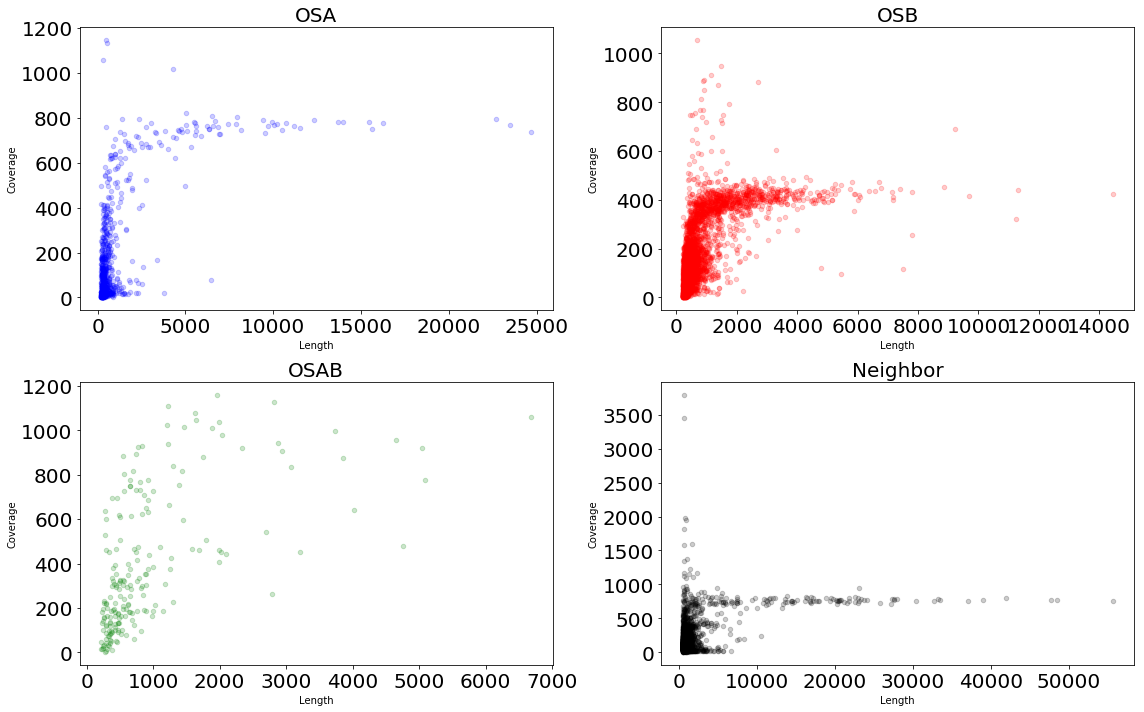

In [20]:
fig,ax = plt.subplots(2,2,figsize=(16,10)) 
df_osa_osb[df_osa_osb['Alignment']=='osa'].plot(kind = 'scatter',x = 'Length',y = 'Coverage',
                                                color = 'blue', alpha = 0.2,
                                                ax = ax[0][0],legend = False,
                                                title = 'OSA', fontsize = 20)
ax[0][0].title.set_size(20)

df_osa_osb[df_osa_osb['Alignment']=='osb'].plot(kind = 'scatter',x = 'Length',y = 'Coverage',
                                                color = 'red', alpha = 0.2,
                                                ax = ax[0][1],legend = False,
                                                title = 'OSB', fontsize = 20)
ax[0][1].title.set_size(20)

df_osa_osb[df_osa_osb['Alignment']=='osab'].plot(kind = 'scatter',x = 'Length',y = 'Coverage',
                                                color = 'green', alpha = 0.2,
                                                ax = ax[1][0],legend = False,
                                                title = 'OSAB', fontsize = 20)
ax[1][0].title.set_size(20)

df_osa_osb[df_osa_osb['Alignment']=='Neighbor'].plot(kind = 'scatter',x = 'Length',y = 'Coverage',
                                                color = 'black', alpha = 0.2,
                                                ax = ax[1][1],legend = False,
                                                title = 'Neighbor', fontsize = 20)
ax[1][1].title.set_size(20)

fig.tight_layout()

fig.savefig('Cov-Len.pdf')

In [21]:
bin_coverage = np.arange(int(df_osa_osb['Coverage'].min()), int(df_osa_osb['Coverage'].max()), 25)
df_osa_osb['Coverage Bin'] = pd.cut(df_osa_osb['Coverage'], bin_coverage, labels = bin_coverage[1:])

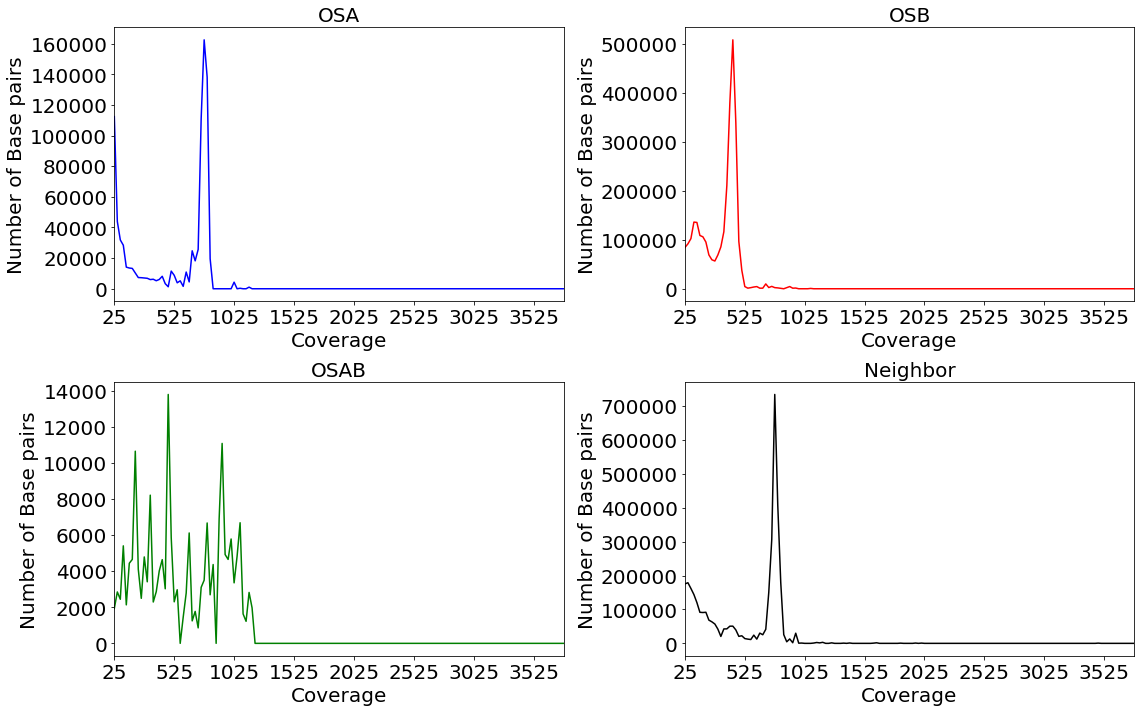

In [22]:
fig,ax = plt.subplots(2,2,figsize=(16,10)) 
df_osa_osb[df_osa_osb['Alignment']=='osa'].groupby('Coverage Bin')[['Length']].sum().plot(
                                                color = 'blue', ax = ax[0][0],legend = 0,
                                                title = 'OSA', fontsize = 20)
ax[0][0].title.set_size(20)
ax[0][0].set_xlabel('Coverage', size = 20)
ax[0][0].set_ylabel('Number of Base pairs',size = 20)

df_osa_osb[df_osa_osb['Alignment']=='osb'].groupby('Coverage Bin')[['Length']].sum().plot(
                                                color = 'red', ax = ax[0][1],legend = 0,
                                                title = 'OSB', fontsize = 20)
ax[0][1].title.set_size(20)
ax[0][1].set_xlabel('Coverage', size = 20)
ax[0][1].set_ylabel('Number of Base pairs',size = 20)

df_osa_osb[df_osa_osb['Alignment']=='osab'].groupby('Coverage Bin')[['Length']].sum().plot(
                                                color = 'green', ax = ax[1][0],legend = 0,
                                                title = 'OSAB', fontsize = 20)

ax[1][0].title.set_size(20)
ax[1][0].set_xlabel('Coverage', size = 20)
ax[1][0].set_ylabel('Number of Base pairs',size = 20)

df_osa_osb[df_osa_osb['Alignment']=='Neighbor'].groupby('Coverage Bin')[['Length']].sum().plot(
                                                color = 'black', ax = ax[1][1],legend = 0,
                                                title = 'Neighbor', fontsize = 20)

ax[1][1].title.set_size(20)
ax[1][1].set_xlabel('Coverage', size = 20)
ax[1][1].set_ylabel('Number of Base pairs',size = 20)

fig.tight_layout()
fig.savefig('Coverage-Base-Pairs.pdf')

In [23]:
df_osa_osb

,Alignment,Average_Read_Length,Count,Length,Coverage,Coverage Bin
Node,,,,,,
Ga0308421_1000069,Neighbor,150.877028,279518.0,55587.0,758.681796,775
Ga0308421_1115998,Neighbor,150.607652,7580.0,629.0,1814.953895,1825
Ga0308421_1139831,Neighbor,150.872633,3486.0,549.0,958.000000,975
Ga0308421_1026539,osb,150.730480,3855.0,1841.0,315.625204,325
Ga0308421_1034016,Neighbor,150.578378,185.0,1547.0,18.007111,25
...,...,...,...,...,...,...
Ga0308421_1529486,osb,151.000000,7.0,202.0,5.232673,25
Ga0308421_1529608,osb,149.766667,30.0,202.0,22.242574,25
Ga0308421_1531243,osb,149.682540,63.0,201.0,46.915423,50


In [15]:
150.877028*279518.0/55587.0

758.681798127332

In [29]:
df_coverage = pd.read_csv(Graph_path+Sample_id+'_scaffolds_no_rd/contig_coverage',
                          names = ['Node','Coverage'],sep = '\t', index_col = ['Node'])

Coverage    782.454
Name: Ga0308421_1000069, dtype: float64